In [1]:
#Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
plt.style.use("seaborn-whitegrid")

# Data cleaning and Descriptive Analysis Section

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_excel('cancer patient data sets.xlsx') #this is how to read the excel sheet 

In [4]:
data

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [6]:
data.shape

(1000, 25)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

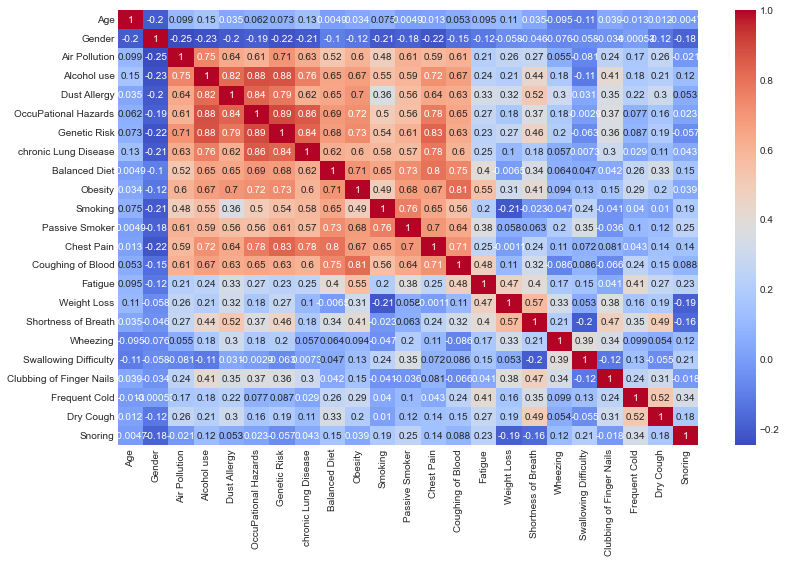

In [9]:
fig = plt.figure(figsize = (13,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True);

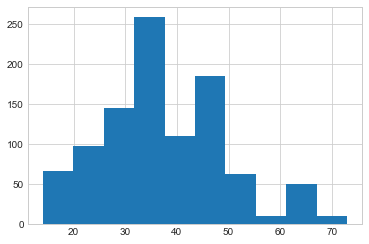

In [10]:
fig, ax = plt.subplots()
hist = ax.hist(x = data["Age"]);

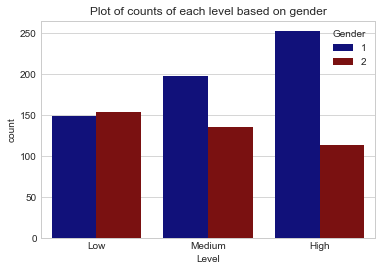

In [11]:
#Required outside of function. This needs to be activated first when plotting in every code block
fig, ax = plt.subplots()

#Count plot of all level in different genders
plot = sns.countplot(data = data, x='Level', hue='Gender', palette=['darkblue','darkred'])
plt.title("Plot of counts of each level based on gender")
plt.show()

In [12]:
# we can see the kind of level of cancer for people aged over 50 years
data50 = data[data["Age"] > 50]
data50

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
11,P108,64,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
15,P111,73,1,5,6,6,5,6,5,6,...,4,3,6,2,1,2,1,6,2,Medium
21,P117,53,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
22,P118,62,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,P954,55,1,3,1,1,1,2,3,4,...,2,5,2,1,2,3,4,5,2,Low
959,P962,62,1,6,8,7,7,7,6,2,...,2,7,6,5,1,9,3,4,2,Medium
968,P970,52,2,1,2,3,4,2,4,3,...,4,1,2,4,6,5,4,2,5,Medium
969,P971,52,1,6,8,7,7,7,6,2,...,2,7,6,5,1,9,3,4,2,Medium


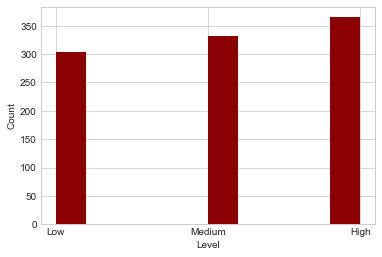

In [13]:
#plot that show the condribution of each level among different patients
fig, ax = plt.subplots()

histt = ax.hist(x = data["Level"], bins = 10, color ='darkred')

ax.set(xlabel = "Level", ylabel = "Count");

In [14]:
data["Level"].replace(["Low", "Medium", "High"], ["0", "1", "2"], inplace=True)

In [15]:
data["Level"] = data["Level"].astype(int)

In [16]:
#counting the number of male and female 
male = 0
female = 0
for i in data["Gender"]:
    if i == 1:
        male += 1
    elif i == 2:
        female += 1
f"Number of Male: {male}, Number of females: {female}"

'Number of Male: 598, Number of females: 402'

# modelling Section

In [17]:
#removing unsed columns
data.drop(["Patient Id"], axis = 1, inplace= True)

In [18]:
data

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


# KNN Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = data.drop(["Level"], axis = 1)
y = data["Level"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [20]:
Y_pred= knn.predict(X_test)  

In [21]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       107

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [22]:
confusion_matrix(Y_test, Y_pred)

array([[ 96,   0,   0],
       [  0,  97,   0],
       [  0,   0, 107]], dtype=int64)

In [23]:
knn_accuracy=knn.score(X_test, Y_test)

In [24]:
knn_accuracy

1.0

In [25]:
Y_pred[75:91]

array([2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2])

# SVM Model

In [26]:
#import required libraries
from sklearn import svm
from sklearn.model_selection import train_test_split



In [27]:
X = data.drop(["Level"], axis = 1)# input dataset
y = data["Level"]# output dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

sv = svm.SVC()
sv.fit(X_train, y_train)
sv.score(X_test, y_test)

0.975

In [28]:
y_preds = sv.predict(X_test)
y_preds[75:91]

array([0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2])

In [29]:
#required libraries for confusion matrix

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       102
           1       0.95      0.98      0.96       133
           2       0.98      1.00      0.99       165

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400



In [30]:
confusion_matrix(y_test, y_preds)

array([[ 95,   7,   0],
       [  0, 130,   3],
       [  0,   0, 165]], dtype=int64)

In [31]:
accuracy_score(y_test, y_preds)

0.975

In [32]:
from sklearn.model_selection import cross_val_score

crossVal_sv = cross_val_score(sv, X, y)
crossVal_knn = cross_val_score(knn, X, y)
print(f"For SupportVectorMachine: {crossVal_sv}, \nFor KNeighborClassifier: {crossVal_knn},")

For SupportVectorMachine: [0.98  0.975 0.985 0.97  0.97 ], 
For KNeighborClassifier: [0.995 1.    1.    1.    0.995],


In [33]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
X1 = data.drop(["Level"], axis = 1)# input dataset
Y1 = data["Level"]# output dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.4)

# CART or Classification Model

In [35]:
model = DecisionTreeClassifier()
model.fit(X_train1, y_train1)
print(model)

DecisionTreeClassifier()


In [36]:

predicted_y = model.predict(X_test1)

In [37]:
print(metrics.classification_report(y_test1, predicted_y))
print(metrics.confusion_matrix(y_test1, predicted_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       140

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

[[126   0   0]
 [  0 134   0]
 [  0   0 140]]


In [38]:
accuracy_score(y_test1, predicted_y)

1.0

# Regreesion Tree model

In [39]:
X2 = data.drop(["Level"], axis = 1)# input dataset
Y2 = data["Level"]# output dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.4)

In [40]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
print(model1)


DecisionTreeRegressor()


In [41]:
predicted_y1 = model1.predict(X_test2)
predicted_y1[75:91]

array([2., 1., 0., 0., 2., 2., 0., 2., 2., 2., 1., 1., 0., 2., 1., 1.])

In [42]:
print(metrics.r2_score(y_test2, predicted_y1))
print(metrics.mean_squared_log_error(y_test2, predicted_y1))

1.0
0.0


In [43]:
print(metrics.classification_report(y_test2, predicted_y1))
print(metrics.confusion_matrix(y_test2, predicted_y1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134
           2       1.00      1.00      1.00       143

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

[[123   0   0]
 [  0 134   0]
 [  0   0 143]]


In [44]:
crossVal_sv = cross_val_score(sv, X, y)
crossVal_knn = cross_val_score(knn, X, y)
crossVal_cart = cross_val_score(model, X1, Y1)
crossVal_regr = cross_val_score(model1, X2, Y2)
print(f"For SupportVectorMachine: {crossVal_sv}, \nFor KNeighborClassifier: {crossVal_knn},\nFor KNeighborClassifier: {crossVal_cart},\nFor KNeighborClassifier: {crossVal_regr},")

For SupportVectorMachine: [0.98  0.975 0.985 0.97  0.97 ], 
For KNeighborClassifier: [0.995 1.    1.    1.    0.995],
For KNeighborClassifier: [1. 1. 1. 1. 1.],
For KNeighborClassifier: [1. 1. 1. 1. 1.],
